<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل دوم: مرور روش‌های کلاسیک یادگیری ماشین (درخت تصمیم گیری)
    </font>
    <br>
      نویسنده:‌ حمیدرضا یعقوبی عراقی
    <hr>
<br>
  <div align="right">
  <font color="red" size=5>فهرست مطالب</font>
	<ul>
    <li>
        <a href="#dataset">
        روند کلی
        </a>
	</li>
    <br>
    <li>
        <a href="#dataset">
          آشنایی با دیتاست
        </a>
    </li>
    <br>
    <li>
        <a href="#columns">
          آشنایی با ستون های دیتاست
        </a>
    </li>
    <br>
    <li>
        <a href="#preprocessing">
          آماده سازی دیتاست
        </a>
    </li>
    <br>
    <li>
        <a href="#Training_classification_Decision_Treeـcriterion_entropy">
    آموزش درخت تصمیم
        </a>
    </li>
    <br>
    <li>
        <a href="#accuracy">
    بررسی دقت
        </a>
    </li>
    <br>
    <li>
        <a href="#Visualization">
    مصورسازی
        </a>
    </li>
    <br>
    <li>
      <a href="#Practice_1">
        تمرین-۱: پیاده سازی درخت تصمیم گیری از نوع طبقه بندی
      </a>
	</li>
    <br>
    <li>
      <a href="#Practice_۲">
        تمرین-۲: پیاده سازی درخت تصمیم گیری از رگرسیون
      </a>
	</li>
    <br>
    </ul>
   </div>
</font>
</div>

<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    روند کلی
  </font>
  <hr />
    در این نوتبوک ابتدا با روند بررسی داه‌ها, نحوه آموزش مدل و بررسی آن آشنا می شویم. سپس در دو تمرین, با جزئیات پیاده سازی Decision Treeها آشنا می شویم.
  <br/>
</font>
</div>


  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        آشنایی با دیتاست
      </font>
      <hr />
      دیتاستی که در این قسمت از آن استفاده خواهد شد، دیتاست مربوط به ارزیابی ماشین هایی است که توسط 
      <a href="https://archive-beta.ics.uci.edu/">
        <font face="Roboto">
          UC Irvine Machine Learning Repository
        </font>
      </a>
      منتشر شده است.
      برای دسترسی به دیتاست مذکور می توانید از <a href="https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set">
        <font face="Roboto">
          این لینک
        </font>
      </a> استفاده کنید.
      <br />
      </font>
    </div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_evaluation_pdf = pd.read_csv("./car_evaluation.csv", header=None)
car_evaluation_column_names = ['buying_price', 'maintenance_cost', 'number_of_doors', 
                               'number_of_persons', 'lug_boot', 'safety', 
                               'decision']
car_evaluation_pdf.columns = car_evaluation_column_names


  <div dir=rtl id="columns">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        آشنایی با ستون‌های دیتاست
      </font>
      <hr />
      دیتاست شامل 7 ستون می شود:
      <ol>
        <li>
          <font face="Roboto">buying_price: </font>
          هزینه خرید که شامل یکی از ۴ نوع زیر است:
          <ul>
            <font face="Roboto">
              <li>
                v-high
              </li>
              <li>
                high
              </li>
              <li>
                med
              </li>
              <li>
                low
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">maintenance_cost: </font>
          هزینه تعمیر و نگه داری که یکی از ۴ نوع زیر است:
          <ul>
            <font face="Roboto">
              <li>
                v-high
              </li>
              <li>
                high
              </li>
              <li>
                med
              </li>
              <li>
                low
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">number_of_doors: </font>
          تعداد در های یک ماشین که شامل یکی از مقدار زیر است:
          <ul>
            <font face="Roboto">
              <li>
                2
              </li>
              <li>
                3
              </li>
              <li>
                4
              </li>
              <li>
                  5more
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">number_of_persons: </font>
          تعداد سرنشین های یک ماشین که شامل یکی از مقدار زیر است:
          <ul>
            <font face="Roboto">
              <li>
                2
              </li>
              <li>
                4
              </li>
              <li>
                  more
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">lug_boot: </font>
          نشان دهنده میزان فضای صندق عقب ماشین است که شامل یکی از ۳ نوع زیر است:
          <ul>
            <font face="Roboto">
              <li>
                small
              </li>
              <li>
                med
              </li>
              <li>
                big
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">safety: </font>
          نشان دهنده میزان امنیت ماشین است که شامل یکی از ۳ نوع زیر است:
          <ul>
            <font face="Roboto">
              <li>
                low
              </li>
              <li>
                med
              </li>
              <li>
                high
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">decision: </font>
          نشان دهنده میزان ارزش ماشین برای خرید است که شامل یکی از ۴ نوع زیر است:
          <ul>
            <font face="Roboto">
              <li>
                unacc
              </li>
              <li>
                acc
              </li>
              <li>
                good
              </li>
              <li>
                vgood
              </li>
            </font>
          </ul>
        </li>
      </ol>
  </font>
  </div>

In [3]:
car_evaluation_pdf.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
for column in car_evaluation_column_names:
    print(car_evaluation_pdf[column].value_counts())  

low      432
high     432
med      432
vhigh    432
Name: buying_price, dtype: int64
low      432
high     432
med      432
vhigh    432
Name: maintenance_cost, dtype: int64
4        432
5more    432
2        432
3        432
Name: number_of_doors, dtype: int64
4       576
more    576
2       576
Name: number_of_persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64


In [5]:
car_evaluation_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_price       1728 non-null   object
 1   maintenance_cost   1728 non-null   object
 2   number_of_doors    1728 non-null   object
 3   number_of_persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB



  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      <font color="red" size=5>آماده‌سازی دیتاست</font>
      <hr />
      قدم اول تبدیل مقادیر غیر عددی به عددی می باشد. این کار را به کمک LabelEncoder کتاب خانه sklearn انجام میدهیم.
    </font>
  </div>

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded_car_evaluation_pdf = car_evaluation_pdf.copy()

for column in car_evaluation_pdf.columns[:-1]:
    encoded_car_evaluation_pdf[column] = encoder.fit_transform(car_evaluation_pdf[column])
    
encoded_car_evaluation_pdf

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,good
1724,1,1,3,2,1,0,vgood
1725,1,1,3,2,0,1,unacc
1726,1,1,3,2,0,2,good



  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      حال ستون‌های ویژگی را از ستون برچسب جدا می کنیم:
    </font>
  </div>

In [7]:
X = encoded_car_evaluation_pdf.drop(['decision'], axis=1)

y = encoded_car_evaluation_pdf['decision']

  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      قدم آخر تقسیم دیتاست به دو قسمت:
      <ul>
        <font face="Roboto">
          <li>
            Training
          </li>
          <li>
            Testing
          </li>
        </font>
      </ul>
      می باشد.
    </font>
  </div>

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


  <div dir=rtl id="Training_classification_Decision_Treeـcriterion_entropy">
    <font face="XB Zar" size=4>
      <font color="red" size=5>آموزش درخت تصمیم</font>
      <hr />
      در این بخش به کمک‌کتاب خانه sklearn, یک درخت تصمیم از نوع طبقه بندی با معیار entropy  را آموزش می دهیم و دقت آن را بررسی می کنیم 
    </font>
  </div>

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


  <div dir=rtl id="accuracy">
    <font face="XB Zar" size=4>
      <font color="red" size=5>بررسی دقت</font>
      <hr />
      برای بررسی دقت, از accuracy استفاده می‌کنیم. برای محاسبه از تابع accuracy_score کتاب‌خانه sklearn استفاده می‌کنیم 
      </font>
  </div>

In [14]:
y_pred = clf_entropy.predict(X_test)
print('Model accuracy score with criterion=entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion=entropy: 0.7653



  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
        همچنین می‌توان این کار را به کمک توابع داخلی مدل نیز انجام داد.:
    </font>
  </div>

In [15]:
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Training set score: 0.7744
Test set score: 0.7653



  <div dir=rtl id="Visualization">
    <font face="XB Zar" size=4>
      <font color="red" size=5>مصور سازی</font>
      <hr />
        برای بررسی بیشتر مدل‌ها می توانیم از مصورسازی کمک بگیریم. این مصور سازی را هم به کمک کتاب خانه sklearn و هم به کمک کتاب خانه graphviz می توانیم انجام دهیم.
        برای نصب این کتاب خانه می توانید از دستور زیر کمک بگیرید:
      </font>
  </div>

  `sudo apt-get install graphviz`

In [15]:
from sklearn import tree
import graphviz 

[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\nentropy = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\nentropy = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.668\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.993\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\nentropy = 1.049\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.383\nsamples = 262\nvalue = [116, 28, 118, 0]')]

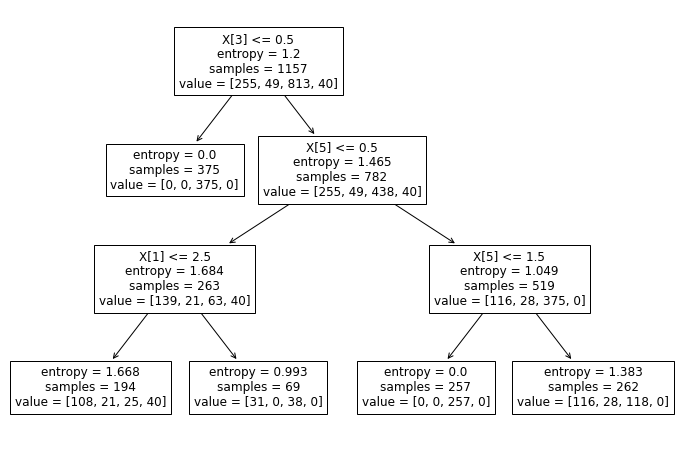

In [16]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_entropy.fit(X_train, y_train))

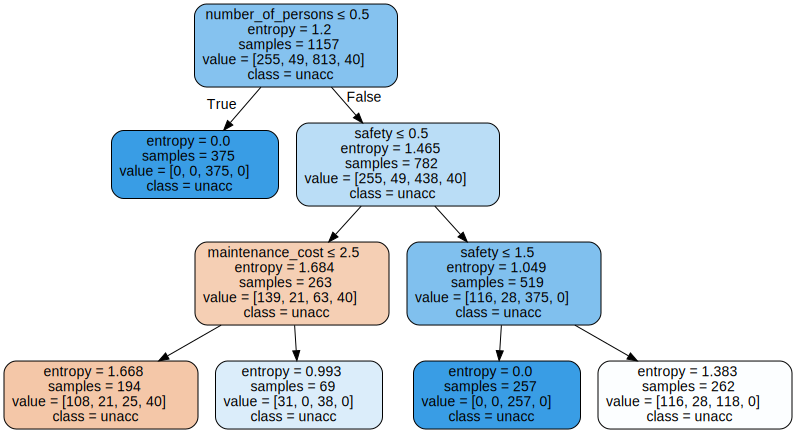

In [17]:
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=y_train,  
                                filled=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 

graph


  <div dir=rtl id="Training_classification_Decision_Treeـcriterion_entropy">
    <font face="XB Zar" size=4>
      <font color="red" size=5>تمرین</font>
      <hr />
      سعی کنید مشابه همین کار را این بار با معیار gini انجام دهید. 
    </font>
  </div>

In [18]:
# clf_gini = #TODO

In [19]:
#TODO


  <div dir=rtl id="Training_classification_Decision_Treeـcriterion_entropy">
    <font face="XB Zar" size=4>
      <font color="red" size=5>پرسش</font>
      <hr />
      به نظر شما آیا این مدل دچار overfitting یا underfitting شده است؟ چرا؟
    </font>
  </div>


  <div dir=rtl id="Practice_1">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        تمرین-۱: پیاده سازی درخت تصمیم گیری از نوع طبقه بندی
      </font>
      <hr />
      در این بخش, قصد داریم تا با پیاده‌سازی یک درخت تصمیم, خوش خیم یا بدخیم بودن یک توده سرطانی را بر اساس ویژگی‌های داده شده, بررسی کنیم. دیتاستی در اختیار شما قرار داده شده که می توانید از طریق   
      <a href="https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset">
        <font face="Roboto">
        این لینک
        </font>
      </a>
      به آن دسترسی پیدا کنید.
      <br>
      ساختار کلی کلاس درخت تصمیم و توابع مورد نیاز آن برای شما مشخص شده است و تنها نیاز است که شما توابع آن را پیاده سازی کنید.
      </font>
    </div>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import log
import random

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        if self.value is not None:
            return True
        return False


class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def is_splitting_finished(self, depth, num_class_labels, num_samples):
        if depth == self.max_depth:
            return True
        
        if num_samples <= self.min_samples_split:
            return True

        if num_class_labels == 1:
            return True

        return False

    def split(self, X, y, feature, threshold):
        left_indexes = X[feature] <= threshold
        right_indexes = -left_indexes
        X_left = X[left_indexes]
        y_left = y[left_indexes]
        X_right = X[right_indexes]
        y_right = y[right_indexes]

        return X_left, X_right, y_left, y_right

    def entropy(self, y):
        p = len(y[y.diagnosis == 1]) / len(y)
        if p == 1 or p == 0:
            return 0
        return -p * log(p, 2) - (1 - p) * log(1 - p, 2)


    def information_gain(self, X, y, feature, threshold):
        X_left, X_right, y_left, y_right = self.split(X, y, feature, threshold)
        H_y = self.entropy(y)
        p = len(X[X[feature] >= threshold]) / len(X)
        if len(y_left) != 0:
            p_left = self.entropy(y_left)
        else:
            p_left = 0
        if len(y_right) != 0:
            p_right = self.entropy(y_right)
        else:
            p_right = 0
        H_y_given_x = p * p_right + (1 - p) * p_left
        return H_y - H_y_given_x

    def best_split(self, X, y):
        features = list(X.columns.values)
        random.shuffle(features)
        best_information_gain = 0
        best_feature = None
        best_threshold = None
        for feature in features:
            thresholds = list(set(list(X[feature])))
            for threshold in thresholds:
                info_gain = self.information_gain(X, y, feature, threshold)
                if info_gain >= best_information_gain:
                    best_information_gain = info_gain
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        if self.is_splitting_finished(depth, len(X.columns), len(X)):
            return None

        best_feature, best_threshold = self.best_split(X, y)
        X_left, X_right, y_left, y_right = self.split(X, y, best_feature, best_threshold)

        left_node = self.build_tree(X_left, y_left, depth=depth + 1)
        right_node = self.build_tree(X_right, y_right, depth=depth + 1)

        value = None
        if left_node is None or right_node is None:
            true_value = len(y[y['diagnosis'] == 1])
            false_value = len(y[y['diagnosis'] == 0])
            if true_value >= false_value:
                value = 1
            else:
                value = 0

        return Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node, value=value)

    def fit(self, X, y):
        self.root = self.build_tree(X, y)

    def predict(self, X):
        tree = self.root
        predicted_value = []
        for index in list(X.index):
            data = X.loc[index]
            current_tree = tree
            for depth in range(self.max_depth):
                if Node.is_leaf(current_tree):
                    predicted_value.append(current_tree.value)
                    break
                feature = current_tree.feature
                threshold = current_tree.threshold
                if data[feature] <= threshold:
                    current_tree = current_tree.left
                if data[feature] > threshold:
                    current_tree = current_tree.right

        return predicted_value

In [21]:
breast_cancer_pdf = pd.read_csv("breast_cancer.csv")

X = breast_cancer_pdf.drop(['diagnosis'], axis=1)

y = breast_cancer_pdf[['diagnosis']]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.70, random_state=42)


  <div dir=rtl id="Training_classification_Decision_Treeـcriterion_entropy">
    <font face="XB Zar" size=4>
      <font color="red" size=5>بررسی دقت با hyperparameter های مختلف</font>
      <hr />
      با پر کردن مقدایر متخلف هر hyperparameter در لیست های هر کدام, می توانید دقت مدل را برای هر ترکیب از آنها مشاهده کنید. 
    </font>
  </div>

In [22]:
max_depths = [1, 2, 5]
min_samples_splits = [1, 10, 100]

In [23]:
best_max_depth = None
best_min_samples_split = None
best_accuracy = 0
best_model = None
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        clf = DecisionTree(max_depth, min_samples_split)
        clf.fit(x_train, y_train)
        y_val_pred = clf.predict(x_val)
        y_train_pred = clf.predict(x_train)
        accuracy = accuracy_score(y_val_pred, y_val)
        train_accuracy = accuracy_score(y_train_pred, y_train)
        print(f"accuracy of training set for min_samples_splits={min_samples_split}-max_depths={max_depth} ={train_accuracy}")
        print(f"accuracy of validation set for min_samples_splits={min_samples_split}-max_depths={max_depth} ={accuracy}")
        print("------------------------------------------------")
        if accuracy >= best_accuracy:
            best_accuracy = accuracy
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split
            best_model = clf

accuracy of training set for min_samples_splits=1-max_depths=1 =0.5764705882352941
accuracy of validation set for min_samples_splits=1-max_depths=1 =0.6491228070175439
------------------------------------------------
accuracy of training set for min_samples_splits=10-max_depths=1 =0.5764705882352941
accuracy of validation set for min_samples_splits=10-max_depths=1 =0.6491228070175439
------------------------------------------------
accuracy of training set for min_samples_splits=100-max_depths=1 =0.5764705882352941
accuracy of validation set for min_samples_splits=100-max_depths=1 =0.6491228070175439
------------------------------------------------
accuracy of training set for min_samples_splits=1-max_depths=2 =0.8705882352941177
accuracy of validation set for min_samples_splits=1-max_depths=2 =0.8771929824561403
------------------------------------------------
accuracy of training set for min_samples_splits=10-max_depths=2 =0.8705882352941177
accuracy of validation set for min_samples


  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        تمرین: پیاده سازی درخت تصمیم گیری-رگرسیون
      </font>
      <hr />
      در این بخش, قصد داریم تا با پیاده سازی یک درخت تصمیم, میزان سطح فشار صدا مقیاس شده یا به اختصار (SSPL) را برای تیغه ایرفویلی با ویژگی های متفاوت تخمین بزنیم. دیتاست ذکر شده را می توانید در   
      <a href="https://www.kaggle.com/datasets/fedesoriano/airfoil-selfnoise-dataset">
        <font face="Roboto">
        این لینک
        </font>
      </a>
      پیدا کنید.
      ساختار کلی کلاس درخت تصمیم, توابع مورد نیاز آن و کارکرد هر کدام برای شما مشخص شده است و تنها نیاز است که شما توابع آن را پیاده سازی کنید.
      </font>
    </div>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

In [25]:
nasa_air_foil_self_noise_pdf = pd.read_csv("./AirfoilSelfNoise.csv")

X = nasa_air_foil_self_noise_pdf.iloc[:, :-1].values
y = nasa_air_foil_self_noise_pdf.iloc[:, -1].values.reshape(-1,1)

X_train, x_val, Y_train, y_val = train_test_split(X, y, test_size=.2, random_state=41)


  <div dir=rtl id="Training_classification_Decision_Treeـcriterion_entropy">
    <font face="XB Zar" size=4>
      <font color="red" size=5>بررسی دقت با hyperparameter های مختلف</font>
      <hr />
      با پر کردن مقدایر متخلف هر hyperparameter در لیست های هر کدام, می توانید دقت مدل را برای هر ترکیب از آنها مشاهده کنید. 
    </font>
  </div>

In [26]:
max_depths = [1, 2, 5]
min_samples_splits = [100, 500, 1000]

In [27]:
from sklearn.metrics import mean_squared_error


best_max_depth = None
best_min_samples_split = None
best_MSE = 0
best_model = None

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        regressor = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth)
        regressor.fit(X_train,Y_train)
        y_val_pred = regressor.predict(x_val)
        y_train_pred = regressor.predict(X_train)
        MSE_error = mean_squared_error(y_val_pred, y_val)
        train_MSE_erroe = mean_squared_error(y_train_pred, Y_train)
        print(f"MSE of training set for min_samples_splits={min_samples_split}-max_depths={max_depth} ={MSE_error}")
        print(f"MSE of validation set for min_samples_splits={min_samples_split}-max_depths={max_depth} ={train_MSE_erroe}")
        print("------------------------------------------------")
        if MSE_error >= best_MSE:
            best_MSE = MSE_error
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split
            best_model = regressor

MSE of training set for min_samples_splits=100-max_depths=1 =35.196463532096516
MSE of validation set for min_samples_splits=100-max_depths=1 =27.478632135664437
------------------------------------------------
MSE of training set for min_samples_splits=500-max_depths=1 =44.66099743911997
MSE of validation set for min_samples_splits=500-max_depths=1 =35.31797443353561
------------------------------------------------
MSE of training set for min_samples_splits=1000-max_depths=1 =47.844451155529946
MSE of validation set for min_samples_splits=1000-max_depths=1 =37.94052870944361
------------------------------------------------
MSE of training set for min_samples_splits=100-max_depths=2 =32.53123050282437
MSE of validation set for min_samples_splits=100-max_depths=2 =25.568747694979262
------------------------------------------------
MSE of training set for min_samples_splits=500-max_depths=2 =43.59236526685189
MSE of validation set for min_samples_splits=500-max_depths=2 =34.5480017642065